In [1]:
# Anil Kumar Ravuru
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv('Final.csv')
df.head()


,name,description,message,fb_like,fb_angry,fb_thankful,fb_haha,fb_sad,fb_wow,fb_love,top_reaction_count,top_reaction,token_words,custom_token_words
0,This Korean Ad Hilariously Addresses The Power...,But how is this about the burger?,A proof that makeup and sorcery go hand in han...,1878,1,0,391,0,3,22,391,fb_haha,korean ad hilari address power makeup gag.tv,korean ad hilari address power makeup gag.tv
1,People Are Losing It For The Hiddle-Swift Split,Click to see the pic and write a comment...,My imaginary relationship with Tom Hiddleston ...,7606,5,0,1629,8,13,269,1629,fb_haha,peopl lose hiddl swift split,peopl lose hiddl swift split
2,"Sia Drops ""The Greatest"" Video Featuring 49 Da...",49 young dancers representing the 49 people lo...,Another amazing and breathtaking video from Si...,25304,6,0,95,44,367,2065,2065,fb_love,sia drop greatest video featur dancer pay trib...,sia drop greatest video featur dancer pay trib...
3,15 Tweets That Remind You Why You Need A Condo...,Click to see the pic and write a comment...,They also remind you how great your parents ar...,3452,2,0,607,0,1,62,607,fb_haha,tweet remind need condom readi,tweet remind need condom readi
4,Russian Topless Women Help Stop Speeding Drive...,Is it the breast idea ever?,"Not sure of if it will help, or cause more acc...",6454,12,0,1245,8,93,162,1245,fb_haha,russian topless woman help stop speed driver c...,russian topless woman help stop speed driver c...


In [2]:
reaction_order = ['fb_love', 'fb_haha', 'fb_wow', 'fb_sad', 'fb_angry']
df['top_reaction'] = df['top_reaction'].apply(lambda x: reaction_order.index(x))
features = df.token_words
actual_features = df.name
custom_features = df.custom_token_words
labels = df.top_reaction

In [4]:
from sklearn.model_selection import train_test_split
train_features, rest_features, train_labels, rest_labels = train_test_split(actual_features, labels, test_size=.1, random_state=6848)
val_features, test_features, val_labels, test_labels = train_test_split(rest_features, rest_labels, test_size=.7, random_state=6848)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [10]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [16]:
def nfeature_accuracy_checker(vectorizer=CountVectorizer(), n_features=np.arange(2000,20000,2000), stop_words=None, ngram_range=(1, 1), classifier=LogisticRegression()):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, train_features, train_labels, val_features, val_labels)
        result.append((n, nfeature_accuracy, tt_time))
    return result

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [19]:
%%time
print("Bigrams with Tfidf")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec, ngram_range=(1, 2))

Bigrams with Tfidf
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 2000 features
accuracy score: 52.52%
train and test time: 5.47s
--------------------------------------------------------------------------------
Validation result for 4000 features
accuracy score: 54.53%
train and test time: 5.50s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 55.83%
train and test time: 4.98s
--------------------------------------------------------------------------------
Validation result for 8000 features
accuracy score: 57.07%
train and test time: 5.50s
-------------------------------------------------------------------

In [20]:
%%time
print("Bigrams with Counts")
feature_result_bgc = nfeature_accuracy_checker(ngram_range=(1, 2))

Bigrams with Counts
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 2000 features
accuracy score: 52.13%
train and test time: 13.52s
--------------------------------------------------------------------------------
Validation result for 4000 features
accuracy score: 54.00%
train and test time: 11.44s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 55.01%
train and test time: 10.67s
--------------------------------------------------------------------------------
Validation result for 8000 features
accuracy score: 56.07%
train and test time: 11.93s
--------------------------------------------------------------

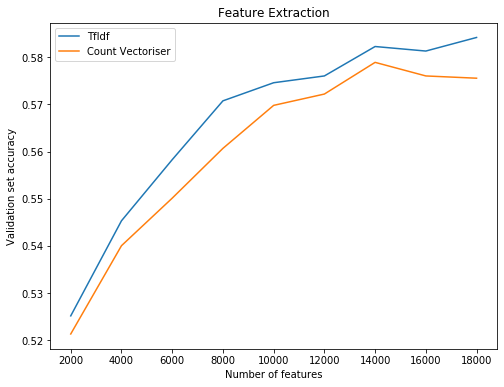

In [22]:
import matplotlib.pyplot as plt
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgc = pd.DataFrame(feature_result_bgc,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy, label='TfIdf')
plt.plot(nfeatures_plot_bgc.nfeatures, nfeatures_plot_bgc.validation_accuracy,label='Count Vectoriser')
plt.title("Feature Extraction")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel

names = ["Multinomial NB", "Logistic Regression", "Linear SVC", "Linear SVC L1"]
classifiers = [MultinomialNB(), LogisticRegression(), LinearSVC(), 
               Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))), 
                         ('classification', LinearSVC(C=2.0, penalty="l2"))])]
zipped_clf = zip(names,classifiers)

In [27]:
def classifier_comparator(vectorizer=TfidfVectorizer(), n_features=15000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy, tt_time = accuracy_summary(checker_pipeline, train_features, train_labels, val_features, val_labels)
        result.append((n, clf_accuracy, tt_time))
    return result

In [28]:
%%time
bigram_result = classifier_comparator(ngram_range=(1,2))

Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy score: 56.02%
train and test time: 2.70s
--------------------------------------------------------------------------------
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 58.27%
train and test time: 4.73s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy sco